# Hackathon 1: Python, ETL and Visualisation

## Objectives

* To extract and isolate and relevant variables.
* To create clear visualisations for the findings.

### Import Packages

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

Updated dataset will be read and loaded to be transformed.

In [7]:
df = pd.read_csv('../data/inputs/cleaned_data.csv')
df.sample(n=5, random_state=28)

,age,sex,bmi,children,smoker,region,charges
1195,19,female,30.020,0,yes,northwest,33307.55080
91,53,female,24.795,1,no,northwest,10942.13205
217,27,male,23.100,0,no,southeast,2483.73600
470,27,male,32.670,0,no,southeast,2497.03830
672,41,female,31.020,0,no,southeast,6185.32080


The dataset has been feature engineered to see if the age, BMI or children variables will affect how much an individual has to be for healthcare insurance. 

In [9]:
df['charges_category'] = pd.cut(df['charges'], bins=[0, 10000, 20000, 30000, 40000, 50000, 60000, np.inf], labels=['0-10k', '10k-20k', '20k-30k', '30k-40k', '40k-50k', '50k-60k', '60k+'])
df

,age,sex,bmi,children,smoker,region,charges,charges_category
0,19,female,27.900,0,yes,southwest,16884.92400,10k-20k
1,18,male,33.770,1,no,southeast,1725.55230,0-10k
2,28,male,33.000,3,no,southeast,4449.46200,0-10k
3,33,male,22.705,0,no,northwest,21984.47061,20k-30k
4,32,male,28.880,0,no,northwest,3866.85520,0-10k
...,...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830,10k-20k
1333,18,female,31.920,0,no,northeast,2205.98080,0-10k
1334,18,female,36.850,0,no,southeast,1629.83350,0-10k
1335,21,female,25.800,0,no,southwest,2007.94500,0-10k


In [11]:
df['charges_bmi_ratio'] = df['charges'] / df['bmi']
df

,age,sex,bmi,children,smoker,region,charges,charges_category,charges_bmi_ratio
0,19,female,27.900,0,yes,southwest,16884.92400,10k-20k,605.194409
1,18,male,33.770,1,no,southeast,1725.55230,0-10k,51.097196
2,28,male,33.000,3,no,southeast,4449.46200,0-10k,134.832182
3,33,male,22.705,0,no,northwest,21984.47061,20k-30k,968.265607
4,32,male,28.880,0,no,northwest,3866.85520,0-10k,133.893878
...,...,...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830,10k-20k,342.284414
1333,18,female,31.920,0,no,northeast,2205.98080,0-10k,69.109674
1334,18,female,36.850,0,no,southeast,1629.83350,0-10k,44.228860
1335,21,female,25.800,0,no,southwest,2007.94500,0-10k,77.827326


In [12]:
df['charges_per_age'] = df['charges'] / df['age']
df

,age,sex,bmi,children,smoker,region,charges,charges_category,charges_bmi_ratio,charges_per_age
0,19,female,27.900,0,yes,southwest,16884.92400,10k-20k,605.194409,888.680211
1,18,male,33.770,1,no,southeast,1725.55230,0-10k,51.097196,95.864017
2,28,male,33.000,3,no,southeast,4449.46200,0-10k,134.832182,158.909357
3,33,male,22.705,0,no,northwest,21984.47061,20k-30k,968.265607,666.196079
4,32,male,28.880,0,no,northwest,3866.85520,0-10k,133.893878,120.839225
...,...,...,...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830,10k-20k,342.284414,212.010966
1333,18,female,31.920,0,no,northeast,2205.98080,0-10k,69.109674,122.554489
1334,18,female,36.850,0,no,southeast,1629.83350,0-10k,44.228860,90.546306
1335,21,female,25.800,0,no,southwest,2007.94500,0-10k,77.827326,95.616429


In [13]:
df['charges_per_child'] = df['charges'] / (df['children'] + 1)
df

,age,sex,bmi,children,smoker,region,charges,charges_category,charges_bmi_ratio,charges_per_age,charges_per_child
0,19,female,27.900,0,yes,southwest,16884.92400,10k-20k,605.194409,888.680211,16884.924000
1,18,male,33.770,1,no,southeast,1725.55230,0-10k,51.097196,95.864017,862.776150
2,28,male,33.000,3,no,southeast,4449.46200,0-10k,134.832182,158.909357,1112.365500
3,33,male,22.705,0,no,northwest,21984.47061,20k-30k,968.265607,666.196079,21984.470610
4,32,male,28.880,0,no,northwest,3866.85520,0-10k,133.893878,120.839225,3866.855200
...,...,...,...,...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830,10k-20k,342.284414,212.010966,2650.137075
1333,18,female,31.920,0,no,northeast,2205.98080,0-10k,69.109674,122.554489,2205.980800
1334,18,female,36.850,0,no,southeast,1629.83350,0-10k,44.228860,90.546306,1629.833500
1335,21,female,25.800,0,no,southwest,2007.94500,0-10k,77.827326,95.616429,2007.945000


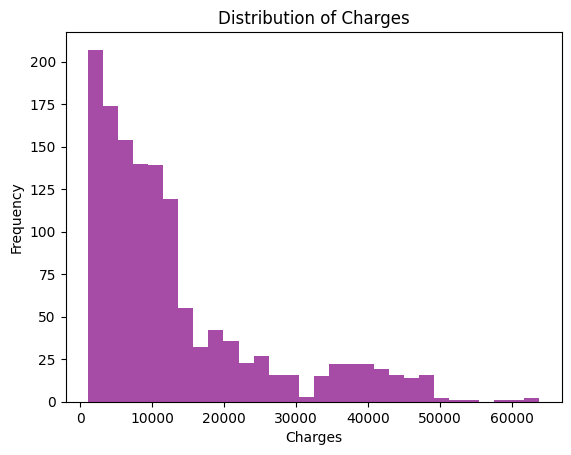

In [18]:
plt.hist(df['charges'], bins=30, color='purple', alpha=0.7)
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Charges')
plt.show()

This histogram shows that the distribution of healthcare charges is heavily weighted towards a lower cost for most individuals in the dataset. Which indicates that its likley for specific variables to be causing the higher charges incurred by some.

In [22]:
fig = px.scatter(df, x='age', y='charges', color='charges_bmi_ratio',
                title='Scatter Plot of Age vs Charges by BMI Category',
                labels={'age': 'Age', 'charges': 'Charges', 'bmi_category': 'charges_bmi_ratio'},)
fig.show()


This scatter plot is visualising the relationship between an individuals BMI, children and healthcare insurance charges. The scatter plot indicates that an individual with a higher BMI is paying more towards their medical insurance, than someone who has a lower BMI. Furthermore, the outliers within the plot represent individuals who incur significantly higher charges, all of whom have a high BMI.

In [23]:
fig = px.scatter(df, x='children', y='charges', color='charges_bmi_ratio',
                title='Scatter Plot of Family Size vs Charges by BMI Category',
                labels={'children': 'Children', 'charges': 'Charges', 'bmi_category': 'charges_bmi_ratio'},)
fig.show()

This scatter plot indicates that the more children you have doesn't heavily impact the charges incurred. This is displayed, as individuals with 1-3 children are paying significantly more in medicals fees, as opposed to individuals with 4-5 children.

## Conclusion

The goal was to identify which factors influence insurance costs the most. Through the analysis of healthcare insurance charges, it was found that BMI and age play a significant role in cost variations. Additionaly, there was a stronger distribution of charges on the lower scale (below 20k), which indicates that higher insurance charges are impacting a smaller amount of people. This study also sought to investigate whether more children would result in higher medical charges, however the analysis suggest thsi doesn't play a huge role. The findings confirm that an indivuals who are older in age or have a higher BMI are more likely to incur higher insurance charges. 

Given the trends identified, insurers could look into implementing flexible payment plans or reduced pricing for those who fall within those categories. Further exploration into the age of an individuals child, could give us greater insight on whether that has a greater impact on charges.